# Build a model that will classify these respondents back into one of the 6 groups.
a. Please explain the choice of metric / evaluation criterion used
b. What are the assumptions you made when building this model?
c. What were the approaches you considered? Please explain the reason for the technique
/ approach used as well as the pros and cons.
d. Please explain under what conditions will the model you choose be not appropriate
e. How confident are you of the model’s robustness and how would you explain the
model’s performance?

A. Please explain the choice of metric / evaluation criterion used
Ans:
Here I used accurecy as a metric for evaluation.

B. What are the assumptions you made when building this model?
Ans:
It assumes that model errors are uncorrelated and uniform (No hetroscedasticity)

C. What were the approaches you considered? Please explain the reason for the technique
approach used as well as the pros and cons.
Ans:
First, I remove columns having missing values. Then, using the PCA find the significant variables to explain variation in the output variable. Then I used that principle component for production. For modeling I used random forest model. First, I selected the model randomly. I got accuracy about 46%. Then I used the grid search approach for fitting the model. 

D. Please explain under what conditions will the model you choose be not appropriate
Ans: 
1)It may not work well when there are non-linear relationship between dependent and independent variables.
2)It may not work if the dependent variables considered in the model are linearly related. Therefore one has to remove correlated variable by some other technique.

E. How confident are you of the model’s robustness and how would you explain the
model’s performance?
Ans:Model is confident about 50%.

f. Why is your model performing well / not well?
Ans:The model is not performing well because of Random forest getting good parameter from grid search CV.For grid search CV required high computation power. So I checked model for some parameter which may not be correct.


g. Was any feature engineering required? If yes, what were they. If no, why?
Ans:
Yes feature engineering technique required.Finding the missing values.Removing the columns having high null values also removing unneccesary columns.Scalling also used.

# Code and analysis

In [ ]:
#Importing Neccesary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [3]:
#importing data from directory
data=pd.read_csv('C:/Internship2/TestData.csv')

In [4]:
#setting index as first variable
data.set_index('Unnamed: 0' )

,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,b.6,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
9,1,1.0,NaN,1,11,1,47,8,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
15,1,2.0,NaN,1,11,1,65,27,1,NaN,...,0,1,0,0,0,0,0,0,0,3.0
16,1,2.0,NaN,1,6,1,65,27,2,1.0,...,0,0,0,0,0,0,0,1,0,3.0
24,1,1.0,NaN,1,3,1,3,2,1,NaN,...,0,0,0,0,0,0,0,0,0,NaN
32,1,1.0,NaN,1,5,1,83,3,1,NaN,...,0,1,0,0,0,1,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22950,12,1.0,NaN,1,6,1,7,48,1,NaN,...,0,0,1,0,0,0,0,0,0,3.0
22955,12,3.0,NaN,1,9,1,79,22,2,1.0,...,0,0,0,0,0,0,0,0,0,NaN
22959,12,3.0,NaN,1,9,1,79,22,2,3.0,...,0,0,1,1,1,0,0,0,0,2.0


In [6]:
#observing the data columns.
data.columns

Index(['Unnamed: 0', 'month', 'var8', 'var6', 'a.1', 'a.2', 'a.3', 'a.4',
       'var5', 'b.5',
       ...
       'c.275', 'c.276', 'c.277', 'c.278', 'c.279', 'c.280', 'c.281', 'c.282',
       'c.283', 'f.284'],
      dtype='object', length=300)

In [7]:
#data infiormation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Columns: 300 entries, Unnamed: 0 to f.284
dtypes: float64(127), int64(171), object(2)
memory usage: 10.5+ MB


In [8]:
#describing the data
data.describe()

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
count,4595.000000,4595.000000,3607.000000,482.000000,4595.0,4595.000000,4595.0,4595.000000,4595.000000,4595.000000,...,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,4595.000000,3433.000000
mean,11430.609793,6.470294,1.951760,2.408714,1.0,6.416757,1.0,55.858107,25.277476,1.569532,...,0.025680,0.327965,0.106855,0.046790,0.070729,0.140152,0.043090,0.071382,0.017193,3.079814
std,6580.298050,3.426722,0.841519,0.853613,0.0,2.426405,0.0,36.505215,10.670218,0.495196,...,0.158196,0.469523,0.308963,0.211212,0.256400,0.347183,0.203083,0.257490,0.130003,1.261790
min,9.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5830.500000,4.000000,1.000000,2.000000,1.0,5.000000,1.0,25.000000,20.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,11355.000000,7.000000,2.000000,2.000000,1.0,6.000000,1.0,57.000000,25.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,17028.500000,9.000000,3.000000,3.000000,1.0,8.000000,1.0,65.000000,30.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,22968.000000,12.000000,3.000000,4.000000,1.0,12.000000,1.0,137.000000,50.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [10]:
#finding the sum of null values in data.
data.isnull().sum()

Unnamed: 0       0
month            0
var8           988
var6          4113
a.1              0
              ... 
c.280            0
c.281            0
c.282            0
c.283            0
f.284         1162
Length: 300, dtype: int64

In [11]:
data.dtypes

Unnamed: 0      int64
month           int64
var8          float64
var6          float64
a.1             int64
               ...   
c.280           int64
c.281           int64
c.282           int64
c.283           int64
f.284         float64
Length: 300, dtype: object

In [13]:
#respone or output variable
y=data['f.284']

In [14]:
#Get Correlation between different variables
corr = data.corr(method='kendall')
corr
#plt.figure(figsize=(30,30))
#sns.heatmap(corr, annot=True)
#data.columns

,Unnamed: 0,month,var8,var6,a.1,a.2,a.3,a.4,var5,b.5,...,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283,f.284
Unnamed: 0,1.000000,0.956999,0.120271,-0.044280,NaN,-0.008864,NaN,-0.011586,0.027606,-0.021124,...,0.020262,0.014662,0.062600,0.079840,0.064379,-0.017050,0.069257,-0.036766,0.022185,0.045281
month,0.956999,1.000000,0.112448,-0.055094,NaN,-0.007944,NaN,-0.013372,0.023793,-0.020402,...,0.022056,0.012243,0.062932,0.082055,0.069940,-0.019089,0.070371,-0.037091,0.021429,0.044165
var8,0.120271,0.112448,1.000000,NaN,NaN,0.010103,NaN,0.007682,0.015333,-0.076422,...,-0.024758,0.062417,0.147082,0.045002,0.074882,0.070128,0.060984,0.001597,0.000609,0.084551
var6,-0.044280,-0.055094,NaN,1.000000,NaN,0.166853,NaN,-0.067340,-0.090016,-0.032470,...,-0.036194,0.099058,0.071519,0.088812,0.081193,0.116765,0.073906,0.074080,0.013932,-0.105963
a.1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c.280,-0.017050,-0.019089,0.070128,0.116765,NaN,-0.016781,NaN,-0.060574,0.079513,-0.161783,...,0.092987,0.297502,0.144456,0.058975,0.094023,1.000000,0.139700,0.019553,-0.048575,-0.042372
c.281,0.069257,0.070371,0.060984,0.073906,NaN,0.005429,NaN,-0.006991,-0.021565,0.013491,...,0.006202,0.082327,0.263114,0.216874,0.221544,0.139700,1.000000,0.007769,-0.019822,0.097290
c.282,-0.036766,-0.037091,0.001597,0.074080,NaN,0.017399,NaN,0.007733,-0.006043,0.107881,...,0.003083,0.007972,-0.032967,0.026628,0.045503,0.019553,0.007769,1.000000,-0.017162,-0.085893
c.283,0.022185,0.021429,0.000609,0.013932,NaN,-0.047766,NaN,-0.055799,0.046956,-0.050696,...,-0.021473,-0.067433,-0.040329,-0.029303,-0.036489,-0.048575,-0.019822,-0.017162,1.000000,-0.076244


In [15]:
#null values in data.
data.isna

<bound method DataFrame.isna of       Unnamed: 0  month  var8  var6  a.1  a.2  a.3  a.4  var5  b.5  ...  \
0              9      1   1.0   NaN    1   11    1   47     8    2  ...   
1             15      1   2.0   NaN    1   11    1   65    27    1  ...   
2             16      1   2.0   NaN    1    6    1   65    27    2  ...   
3             24      1   1.0   NaN    1    3    1    3     2    1  ...   
4             32      1   1.0   NaN    1    5    1   83     3    1  ...   
...          ...    ...   ...   ...  ...  ...  ...  ...   ...  ...  ...   
4590       22950     12   1.0   NaN    1    6    1    7    48    1  ...   
4591       22955     12   3.0   NaN    1    9    1   79    22    2  ...   
4592       22959     12   3.0   NaN    1    9    1   79    22    2  ...   
4593       22965     12   NaN   NaN    1    5    1  133    25    1  ...   
4594       22968     12   3.0   NaN    1    4    1   79    22    2  ...   

      c.275  c.276  c.277  c.278  c.279  c.280  c.281  c.282  c.283

In [16]:
#removing columns having  null valiues.
data=data.dropna(how='any',axis=1)
#data

,Unnamed: 0,month,a.1,a.2,a.3,a.4,var5,b.5,b.7,b.9,...,c.274,c.275,c.276,c.277,c.278,c.279,c.280,c.281,c.282,c.283
0,9,1,1,11,1,47,8,2,1,1,...,0,0,0,0,0,0,0,0,1,0
1,15,1,1,11,1,65,27,1,1,2,...,0,0,1,0,0,0,0,0,0,0
2,16,1,1,6,1,65,27,2,1,2,...,0,0,0,0,0,0,0,0,1,0
3,24,1,1,3,1,3,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,32,1,1,5,1,83,3,1,1,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,22950,12,1,6,1,7,48,1,1,2,...,0,0,0,1,0,0,0,0,0,0
4591,22955,12,1,9,1,79,22,2,1,2,...,0,0,0,0,0,0,0,0,0,0
4592,22959,12,1,9,1,79,22,2,1,2,...,0,0,0,1,1,1,0,0,0,0
4593,22965,12,1,5,1,133,25,1,1,2,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x=data


In [18]:
#filling null values of output by 6.
y=y.fillna(6)
y

0       3.0
1       3.0
2       3.0
3       6.0
4       6.0
       ... 
4590    3.0
4591    6.0
4592    2.0
4593    1.0
4594    1.0
Name: f.284, Length: 4595, dtype: float64

In [19]:
#scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)


In [20]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

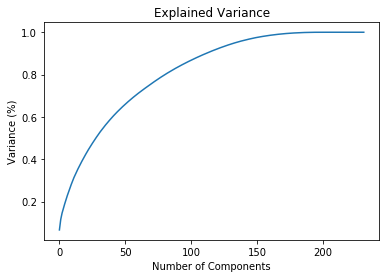

In [22]:
#applying the Principle complnent analysis.
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [23]:
#first 100 variables explaines near about 90% variation in data.So selecting first 100 principle components.
pca = PCA(n_components=100)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data)

In [24]:
principal_Df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.545996,-0.863388,-3.977816,2.380475,4.820018,3.315701,-2.909405,-0.038166,-1.977940,1.242459,...,-0.396872,-0.181695,-0.593019,-0.913903,-1.827028,-0.115618,-0.405774,-0.893923,-0.182828,0.140305
1,1.309547,4.202583,-0.505890,-0.725106,1.517746,1.920678,-2.962727,-1.851152,-2.968038,0.147958,...,0.257655,-0.450535,-2.123995,0.833161,-0.574939,0.700546,-0.222989,-0.087237,-0.943456,1.625214
2,0.971298,-9.185912,-1.358245,11.538792,17.043952,10.938518,-11.398100,0.437987,2.878046,0.134960,...,-0.691466,-0.613570,1.790585,0.080627,1.180126,0.932402,-0.715925,0.425137,-1.038934,-0.956510
3,-1.938034,1.196707,-2.905504,-1.033143,0.658586,1.505054,-1.890231,-0.389440,-2.082574,1.667772,...,0.413501,0.139557,-0.439978,0.229774,0.263844,0.727344,0.781734,0.628268,-0.506313,-0.774935
4,0.277657,-0.886365,-3.203628,-2.549419,-0.042485,1.664574,-1.892612,-0.514711,-3.149839,1.821745,...,0.174503,-0.214940,1.396207,-0.988438,-0.288467,-0.990827,0.671357,-0.408862,0.429172,-0.564074


In [26]:
#FITTING RANDOM FOREST TO DATA
#importing library
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [34]:
#splitting data into train test
x_train,x_test,y_train,y_test=train_test_split(principal_Df,y,test_size=0.30,random_state=355)

In [35]:
#Import the model we are using
#randomly fitting modl to data 
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [38]:
# Use the forest's predict method on the test data
predictions = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 1.3 degrees.


In [40]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 45.93 %.


In [ ]:
#geting accuracy near about 46 %

In [ ]:
#hyperparameter tuning for random forest.

In [41]:
rand_clf = RandomForestClassifier(random_state=6)

In [42]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [55]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [500,1000],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(2,5,1),
    'max_features' : ['auto','log2']
}

In [56]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [57]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 115.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 141.6min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 181.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 228.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 297.9min


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
rand_clf.fit(x_train,y_train)

In [ ]:
rand_clf.score(x_test,y_test)

# fitting xgboost model with default parameter.

In [60]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [61]:
model = XGBClassifier()

# fit the model with the training data
model.fit(x_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [67]:
# predict the target on the train dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 


Target on test data [4. 6. 6. ... 6. 4. 6.]


In [66]:
# Accuray Score on test dataset
accuracy_train = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_train)


accuracy_score on test dataset :  0.3567802755620014
